# Глава 12. Обработка и анализ данных
В предыдущих главах мы рассмотрели основные темы традиционного научного вычисления. Эти темы предоставляют основу для большинства вычислительных работ. Начиная с этой главы, мы переходим к исследованию обработки данных и анализа, статистики и статистического моделирования. В качестве первого шага в этом направлении мы рассмотрим библиотеку анализа данных `pandas`. Эта библиотека предоставляет удобные структуры данных для представления серий и таблиц данных и облегчает их преобразование, разделение, слияние и конвертацию. Это важные шаги в процессе преобразования сырых данных в аккуратную форму, подходящую для анализа. Библиотека `Pandas` строится на основе библиотеки `NumPy` и дополняет ее функциями, которые особенно полезны при работе с данными, такими как индексирование с метками, иерархические индексы, выравнивание данных для сравнения и объединения наборов данных, обработка пропущенных данных и многое другое. Таким образом, библиотека `pandas` стала де-факто стандартной библиотекой для высокоуровневой обработки данных на языке `Python`, особенно для приложений статистики. Сама по себе библиотека `pandas` содержит лишь ограниченную поддержку статистического моделирования (а именно линейной регрессии). Для более сложного статистического анализа и моделирования доступны другие пакеты, такие как `statsmodels`, `patsy` и `scikit-learn`, о которых мы поговорим в последующих главах. Однако даже для статистического моделирования с этими пакетами `pandas` все еще может использоваться для представления и подготовки данных. Поэтому библиотека `pandas` является ключевым компонентом программного стека для анализа данных на `Python`.

> Библиотека `pandas` - это фреймворк для обработки и анализа данных на языке Python. На момент написания этой книги, последней версией библиотеки `Pandas` является 0.23.4. Для получения дополнительной информации о библиотеке pandas и ее официальной документации посетите веб-сайт проекта по адресу: [http://pandas.pydata.org](http://pandas.pydata.org).

Основная цель данной главы - представить основные функции и использование библиотеки pandas. В конце главы мы также кратко рассмотрим библиотеку статистической визуализации `Seaborn`, которая построена на основе `Matplotlib`. Эта библиотека предоставляет быструю и удобную графику для данных, представленных в виде структуры `pandas` (или массивов `NumPy`). Визуализация является важной частью исследовательского анализа данных, а сама библиотека `Pandas` также предоставляет функции для базовой визуализации данных (которые также основаны на `Matplotlib`). Библиотека `Seaborn` идет дальше, предлагая дополнительные возможности графического представления статистики и улучшенный стиль; она известна тем, что создает качественные графики с использованием настроек по умолчанию.

> Библиотека `Seaborn` - это библиотека визуализации для статистических графиков. Она основана на `Matplotlib` и предоставляет простые в использовании функции для создания распространенных статистических графов. На данный момент последней версией `Seaborn` является 0.8.1. Для более подробной информации о `Seaborn` и его официальной документации перейдите на сайт проекта: [http://stanford.edu/~mwaskom/software/seaborn](http://stanford.edu/~mwaskom/software/seaborn).

## Импортирование модулей
В этой главе мы в основном работаем с библиотекой pandas, которую мы импортируем под именем pd

In [1]:
import pandas as pd

Нам также потребуется библиотека NumPy и Matplotlib, которые мы импортируем следующим образом:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Для более эстетичного вида графиков Matplotlib, создаваемых библиотекой `pandas`, мы выбираем стиль, подходящий для статистических графиков, используя функцию `mpl.style.use`:

In [3]:
import matplotlib as mpl
mpl.style.use('ggplot')

Позже в этой главе нам также потребуется импортировать модуль `seaborn`, который мы будем импортировать под именем `sns`:

In [4]:
import seaborn as sns

## Введение в Pandas
Основная тема этой главы - библиотека `pandas` для анализа данных, и здесь мы начинаем с введения в эту библиотеку. Библиотека `pandas` предоставляет структуры данных и методы для представления и манипулирования данными. Две основные структуры данных в Pandas - это объекты `Series` и `DataFrame`, которые используются для представления последовательностей данных и табличных данных соответственно. Оба этих объекта имеют индекс для доступа к элементам или строкам в данных, представленных объектом. По умолчанию индексы являются целыми числами, начиная с нуля, как массивы NumPy, но можно использовать любую последовательность идентификаторов в качестве индекса.

## Series
Преимущества использования меток вместо целых чисел для индексации последовательности данных очевидны даже в самых простых примерах. Рассмотрим следующий пример создания объекта `Series`. Мы передаем конструктору список целых чисел, чтобы создать объект `Series`, представляющий данные. Отображение этого объекта в IPython показывает данные объекта `Series` вместе с соответствующими индексами:

In [5]:
s = pd.Series([909976, 8615246, 2872086, 2273305])

In [6]:
s

,0
0,909976
1,8615246
2,2872086
3,2273305


Результатом является экземпляр объекта типа `Series` с типом данных `(dtype) int64`, и элементы индексируются целыми числами от 0 до 3. Используя атрибуты индекса и значений, мы можем извлечь основные данные для индекса и значения, хранящиеся в серии.

In [7]:
type(s)

pandas.core.series.Series

In [8]:
s.dtype

dtype('int64')

In [9]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [10]:
s.values

array([ 909976, 8615246, 2872086, 2273305])

Хотя использование массивов или серий данных с целочисленным индексом представляет собой полностью функциональное представление данных, оно не является описательным. Например, если данные представляют население четырех европейских столиц, удобно и описательно использовать названия городов в качестве индексов вместо целых чисел. С объектом `Series` это возможно, и мы можем присвоить атрибуту индекса объекта `Series` список с новыми индексами, чтобы достичь этого. Мы также можем установить атрибут имени объекта `Series`, чтобы дать ему описательное имя.

In [11]:
s.index = ["Stockholm", "London", "Rome", "Rome"]

In [12]:
s.name = "Population"

In [13]:
s

,Population
Stockholm,909976
London,8615246
Rome,2872086
Rome,2273305


In [14]:
s.loc["Rome"]
s["Rome"]

,Population
Rome,2872086
Rome,2273305


Теперь сразу становится понятно, что представляют эти данные. В качестве альтернативы, мы также можем установить параметры индекса и имени через ключевые аргументы при создании объекта `Series`.

In [15]:
s = pd.Series([909976, 8615246, 2872086, 2273305],
              index=["Stockholm", "London", "Rome", "Paris"], name="Population")

Хотя вполне возможно хранить данные о населении этих городов непосредственно в массиве `NumPy`, даже в этом простом примере гораздо яснее, что означают данные, когда точки данных индексированы значимыми метками. Преимущества приведения описания данных ближе к самим данным еще больше увеличиваются по мере увеличения сложности набора данных.
Мы можем получить доступ к элементам в серии путем индексации с соответствующим индексом (меткой) или напрямую через атрибут с тем же именем, что и у индекса (если метка индекса является допустимым символом имени Python).

In [16]:
s["London"]

8615246

In [17]:
s.Stockholm

909976

Индексирование объекта `Series` со списком индексов дает новый объект `Series` с подмножеством исходных данных (соответствующих предоставленному списку индексов).

In [18]:
s[["Paris", "Rome"]]

,Population
Paris,2273305
Rome,2872086


С данными серии, представленными как объект `Series`, мы можем легко вычислить их описательную статистику, используя методы `Series`: `count` (количество точек данных), `медиана` (вычисление медианы), `среднее значение` (вычисление среднего значения), стандартное отклонение (`std`), минимальное и максимальное значения (`min` и `max`) и квантиль (для расчета квантиля).

In [19]:
s.median(), s.mean(), s.std()

(2572695.5, 3667653.25, 3399048.5005155364)

In [20]:
s.min(), s.max()

(909976, 8615246)

In [21]:
s.quantile(q=0.25), s.quantile(q=0.5), s.quantile(q=0.75)

(1932472.75, 2572695.5, 4307876.0)

Все эти данные объединены в выводе метода `describe`, который предоставляет сводку данных, представленных объектом `Series`.

In [22]:
s.describe()

,Population
count,4.000000e+00
mean,3.667653e+06
std,3.399049e+06
min,9.099760e+05
25%,1.932473e+06
50%,2.572696e+06
75%,4.307876e+06
max,8.615246e+06


Используя метод `plot`, мы можем быстро и легко создавать графики, визуализирующие данные в объекте `Series`. Библиотека pandas использует `Matplotlib` для построения графиков, и мы можем дополнительно передать экземпляр оси `Matplotlib` методу `plot` через аргумент `ax`. Тип графика задается с помощью аргумента `kind` (допустимые варианты: линия, гистограмма, столбец, горизонтальный столбец, коробка, плотность вероятности, область, круговая диаграмма).

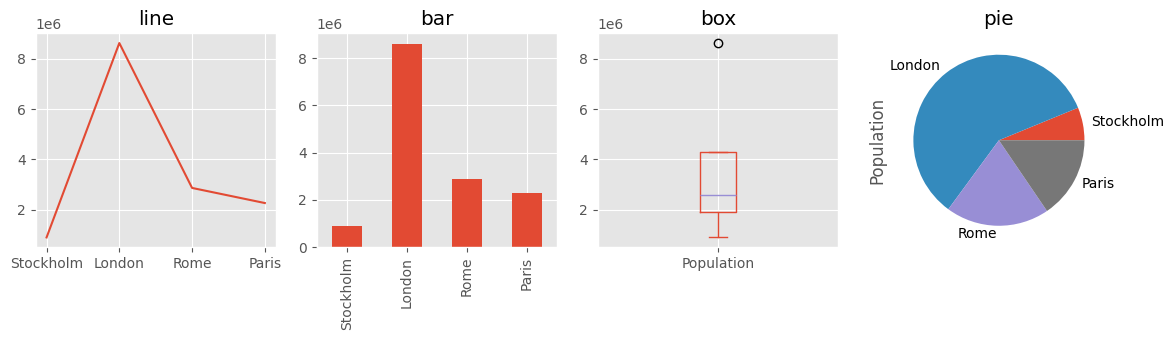

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3.5))

s.plot(ax=axes[0], kind='line', title="line")
s.plot(ax=axes[1], kind='bar', title="bar")
s.plot(ax=axes[2], kind='box', title="box")
s.plot(ax=axes[3], kind='pie', title="pie")

fig.tight_layout()

## DataFrame
Как мы видели в предыдущих примерах, объект `Series` предоставляет удобное хранилище для одномерных массивов, которые могут использовать описательные метки для элементов и которые обеспечивают быстрый доступ к описательной статистике и визуализации. Для многомерных массивов (в основном двумерные массивы или таблицы) соответствующей структурой данных является объект `DataFrame` библиотеки `Pandas`. Его можно рассматривать как коллекцию объектов `Series` с общим индексом.

Существует множество способов инициализации `DataFrame`. Для простых примеров самый простой способ — передать вложенный список `Python` или словарь конструктору объекта `DataFrame`. Например, рассмотрим расширение набора данных, который мы использовали в предыдущем разделе, где, помимо населения каждого города, мы также включаем столбец, указывающий, какому государству принадлежит каждый город. Соответствующий объект `DataFrame` может быть создан следующим образом.

In [24]:
df = pd.DataFrame([[909976, 8615246, 2872086, 2273305],
                   ["Sweden", "United kingdom", "Italy", "France"]])

In [25]:
df

,0,1,2,3
0,909976,8615246,2872086,2273305
1,Sweden,United kingdom,Italy,France


In [26]:
df = pd.DataFrame([[909976, "Sweden"],
                   [8615246, "United kingdom"],
                   [2872086, "Italy"],
                   [2273305, "France"]])

In [27]:
df

,0,1
0,909976,Sweden
1,8615246,United kingdom
2,2872086,Italy
3,2273305,France


Результат — табличная структура данных с рядами и столбцами. Как и в случае с объектом `Series`, мы можем использовать помеченную индексацию строк, присваивая последовательность меток атрибуту индекса, а также можем установить атрибут столбцов для последовательности меток столбцов.

In [28]:
df.index = ["Stockholm", "London", "Rome", "Paris"]

In [29]:
df.columns = ["Population", "State"]

In [30]:
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


Атрибуты индекса и столбцов также могут быть установлены с использованием соответствующих ключевых аргументов объекта `DataFrame` при его создании:

In [31]:
df = pd.DataFrame([[909976, "Sweden"],
                   [8615246, "United kingdom"],
                   [2872086, "Italy"],
                   [2273305, "France"]],
                  index=["Stockholm", "London", "Rome", "Paris"],
                  columns=["Population", "State"])
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


Альтернативный способ создания той же таблицы данных, который иногда может быть более удобным, заключается в передаче словаря с заголовками столбцов в качестве ключей и данными столбцов как значений:

In [32]:
df = pd.DataFrame({"Population": [909976, 8615246, 2872086, 2273305],
                   "State": ["Sweden", "United kingdom", "Italy", "France"]},
                  index=["Stockholm", "London", "Rome", "Paris"])
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


Как и раньше, основные данные в `DataFrame` можно получить в виде массива `NumPy`, используя атрибут значения, а массивы индексов и столбцов через атрибуты индекса и столбца соответственно. Каждый столбец в таблице данных можно получить, используя имя столбца в качестве атрибута или путем индексирования по метке столбца (или, в качестве альтернативы, используя индекс столбца, например, `df["Population"]`:

In [33]:
df.Population

,Population
Stockholm,909976
London,8615246
Rome,2872086
Paris,2273305


Результатом извлечения столбца из `DataFrame` является новый объект `Series`, который мы можем обрабатывать и манипулировать методами, рассказанными в предыдущем разделе. Строки экземпляра `DataFrame` могут быть получены с помощью атрибута локатора индекса. Индексирование этого атрибута также приводит к созданию нового объекта `Series`, соответствующего строке исходной таблицы данных.

In [34]:
df.loc["Stockholm"]

,Stockholm
Population,909976
State,Sweden


Передача списка меток строк в индексатор `loc` приводит к новому `DataFrame`, являющемуся подмножеством исходного `DataFrame` и содержащего только выбранные строки:

In [35]:
df.loc[["Paris", "Rome"]]

,Population,State
Paris,2273305,France
Rome,2872086,Italy


Индексатор `loc` может использоваться для выбора одновременно строк и столбцов, сначала передавая метку строки (или список таких меток), а затем метку столбца (или их список). Результатом будет объект типа `DataFrame`, `Series` или значение элемента, в зависимости от того, какое число строк и столбоц было передано:


In [36]:
df.loc[["Paris", "Rome"], "Population"]

,Population
Paris,2273305
Rome,2872086


Мы можем вычислить описательную статистику, используя те же методы, которые уже использовались для объектов `Series`. Когда эти методы (например, `mean`, `std`, `median`, `min`, `max`, и т.д.) вызываются для `DataFrame`, расчет выполняется для каждого столбца с числовыми типами данных.
Если же в таблице данных присутствуют столбцы с нечисловыми значениями, требуется передать параметр `numeric_only=True`, чтобы [функция не выдала ошибку](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html#pandas.DataFrame.mean), т.к. в нашем случае, лишь один из двух столбцов содержит числовые данные (`Population`)

In [37]:
df.mean(numeric_only=True)

,0
Population,3667653.25


С помощью метода `info` объекта `DataFrame` и атрибута `dtypes` можно получить сводную информацию о содержимом `DataFrame` и типы данных каждого столбца.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Stockholm to Paris
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Population  4 non-null      int64 
 1   State       4 non-null      object
dtypes: int64(1), object(1)
memory usage: 268.0+ bytes


In [39]:
df.dtypes

,0
Population,int64
State,object


Настоящие преимущества использования `pandas` проявляются при работе с большими и сложными наборами данных, чем примеры, которые мы использовали до сих пор. Такие данные редко могут быть определены явно в виде списков или словарей, которые могут быть переданы инициализатору `DataFrame`. Более распространенной ситуацией является необходимость чтения данных из файла или другого внешнего источника. Библиотека `pandas` поддерживает множество методов для чтения данных из файлов различных форматов. Здесь используется функция `read_csv` для чтения данных и создания объекта `DataFrame` из CSV-файла. Эта функция принимает большое количество опциональных аргументов для настройки её поведения. См. документацию `help(pd.read_csv)` для подробностей. Некоторые, наиболее полезные аргументы: `header` (указывает какая строка, если имеется, содержит заголовок с названиями строк), `skiprows` (число строк, которые нужно пропустить перед чтением файла, или список количества строк, `delimiter` (символ, который используется в качестве разделителя между столбцами значений), `encoding` (название кодировки, используемый в файле, например, `utf-8`) и `nrows` (количество строк, которое нужно прочитать). Первый и единственный обязательный аргумент в функции `pd.read_csv` это название файла или URL, содержащий файл. Например, чтобы прочитать датасет, содержащийся в файле с названием `european_cities.csv`, чьи первые 5 строк указаны в следующем блоке кода, мы можем вызвать функцию `pd.read_csv("european_cities.csv")`, т.к. по умолчанию, разделителем является символ `","` а заголовок берется с первой строки. Тем не менее, можно описать эти аргументы вручную:

In [40]:
from google.colab import drive
drive.mount('/content/gdrive')

!head -n 5 "/content/gdrive/MyDrive/Colab Notebooks/european_cities.csv"

Mounted at /content/gdrive
Rank,City,State,Population,Date of census/estimate
1,London[2], United Kingdom,"8,615,246",1 June 2014
2,Berlin, Germany,"3,437,916",31 May 2014
3,Madrid, Spain,"3,165,235",1 January 2014
4,Rome, Italy,"2,872,086",30 September 2014


In [41]:
!tail -n 5 "/content/gdrive/MyDrive/Colab Notebooks/european_cities.csv"

101,Bonn, Germany,"309,869",31 December 2012
102,Malmö, Sweden,"309,105",31 March 2013
103,Nottingham, United Kingdom,"308,735",30 June 2012
104,Katowice, Poland,"308,269",30 June 2012
105,Kaunas, Lithuania,"306,888",1 January 2013


In [42]:
df_pop = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/european_cities.csv",
                     delimiter=",", encoding="utf-8", header=0)

Набор данных, который мы используем здесь, похож на пример данных, которые мы использовали ранее в этой главе, но он содержит дополнительные столбцы и множество строк для других городов. После того как набор данных загружен в объект `DataFrame`, полезно начать с просмотра сводки, предоставленной методом `info`, чтобы сформировать представление о свойствах набора данных.

In [43]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     105 non-null    int64 
 1   City                     105 non-null    object
 2   State                    105 non-null    object
 3   Population               105 non-null    object
 4   Date of census/estimate  105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


Здесь видно, что в этом наборе данных 105 строк и пять столбцов. Только столбец `"Rank"` имеет числовой тип данных. В частности, столбец `"Population"` еще не является числовым типом данных, потому что его значения имеют формат `"8,615,246"`, поэтому функция `read_csv` интерпретирует их как строки. Также полезно отобразить табличный вид данных. Однако этот набор данных слишком велик, чтобы отображать его полностью, и в таких ситуациях методы `head` и `tail` полезны для создания усеченного набора данных, содержащего первые несколько и последние несколько строк соответственно. Оба этих метода принимают необязательный аргумент, который задает количество строк, включаемых в усеченный `DataFrame`. Обратите внимание, что `df.head(n)` эквивалентно `df[:n]`, где `n` - целое число.

In [44]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


Отображение усеченного фрейма данных дает хорошее представление о том, как выглядят данные и что еще предстоит сделать перед тем, как данные будут готовы к анализу. Часто бывает необходимо преобразовать столбцы тем или иным образом и переупорядочить таблицу путем сортировки по определенному столбцу или упорядочения индекса. Далее мы рассмотрим некоторые методы изменения объектов `DataFrame`. Во-первых, мы можем создавать новые столбцы и обновлять столбцы в `DataFrame`, просто присваивая объект `Series` объекту `DataFrame` с индексом по имени столбца, а также можем удалять столбцы с помощью ключевого слова Python `del`.

Метод `apply` - это мощный инструмент для преобразования содержимого в столбце. Он создает и возвращает новый объект `Series`, для которого функция, переданная методу `apply`, была применена к каждому элементу исходного столбца. Например, мы можем использовать метод `apply` для преобразования элементов в столбце `Population` из строк в целые числа, передавая функцию `lambda`, которая удаляет символы `","` из строк и приводит результаты к целому числу. Здесь мы назначаем преобразованный столбец новому столбцу с именем `NumericPopulation`. Используя тот же метод, мы также приводим в порядок значения `State`, удаляя лишние пробелы в его элементах с помощью метода строки `strip`.

In [45]:
df_pop["NumericPopulation"] = df_pop.Population.apply(lambda x: int(x.replace(",", "")))

In [46]:
df_pop["State"].values[:3]

array([' United Kingdom', ' Germany', ' Spain'], dtype=object)

In [47]:
df_pop["State"] = df_pop["State"].apply(lambda x: x.strip())

In [48]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate,NumericPopulation
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


Метод сортировки индексов также принимает список имен столбцов, в этом случае создается иерархический индекс. Иерархический индекс использует кортежи меток индекса для адресации строк в `DataFrame`. Мы можем использовать метод сортировки индексов с целочисленным аргументом уровня `level`, чтобы отсортировать строки в `DataFrame` в соответствии с `n`-м уровнем иерархического индекса, где `level=n`. В следующем примере мы создаем иерархический индекс со странами и городами в качестве индексов и используем метод сортировки индексов для сортировки по первому индексу (государству):

In [49]:
df_pop3 = df_pop.set_index(['State', 'City']).sort_index(level=0)
df_pop3.head(7)

Rank Population Date of census/estimate  \
State    City                                                    
Austria  Vienna           7  1,794,770          1 January 2015   
Belgium  Antwerp         59    510,610          1 January 2014   
         Brussels[17]    16  1,175,831          1 January 2014   
Bulgaria Plovdiv         84    341,041        31 December 2013   
         Sofia           14  1,291,895        14 December 2014   
         Varna           85    335,819        31 December 2013   
Croatia  Zagreb          24    790,017           31 March 2011   

                       NumericPopulation  
State    City                             
Austria  Vienna                  1794770  
Belgium  Antwerp                  510610  
         Brussels[17]            1175831  
Bulgaria Plovdiv                  341041  
         Sofia                   1291895  
         Varna                    335819  
Croatia  Zagreb                   790017

`DataFrame` с иерархическим индексом может быть частично проиндексирован с использованием только его нулевого уровня индекса (`df3.loc['Sweden']`) или полностью проиндексирован с использованием кортежа всех иерархических индексов (`df3.loc[('Sweden', 'Gothenburg')]`):

In [50]:
df_pop3.loc['Sweden']

,Rank,Population,Date of census/estimate,NumericPopulation
City,,,,
Gothenburg,53,"528,014",31 March 2013,528014
Malmö,102,"309,105",31 March 2013,309105
Stockholm,20,"909,976",31 January 2014,909976


Если мы хотим отсортировать по столбцу, а не по индексу, мы можем использовать метод `sort_values`. Он принимает имя столбца или список имен столбцов, относительно которых должен быть отсортирован `DataFrame`. Он также принимает ключевое слово `ascending`, которое является булевым значением или списком булевых значений, который указывает, следует ли сортировать соответствующий столбец в порядке возрастания или убывания:

In [51]:
df_pop.set_index('City').sort_values(['State', 'NumericPopulation'], ascending=[False, True]).head()

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Nottingham,103,United Kingdom,"308,735",30 June 2012,308735
Wirral,97,United Kingdom,"320,229",30 June 2012,320229
Coventry,94,United Kingdom,"323,132",30 June 2012,323132
Wakefield,91,United Kingdom,"327,627",30 June 2012,327627
Leicester,87,United Kingdom,"331,606",30 June 2012,331606


С категориальными данными, такими как столбец `State`, часто бывает нужным узнать, сколько значений каждой категории содержит столбец. Такие подсчеты могут быть выполнены с помощью метода `value_counts` объекта `Series`. Например, чтобы посчитать количество городов в каждой стране в списке 105 крупнейших городов Европы, можно использовать:


In [52]:
city_counts = df_pop.State.value_counts()
city_counts.head()

,count
State,
Germany,19
United Kingdom,16
Spain,13
Poland,10
Italy,10


В этом примере видно из результатов, что страна с наибольшим количеством городов в списке - Германия, с 19 городами, за ней следуют Великобритания с 16 городами и так далее. В связи с этим возникает вопрос, насколько велико общее население всех городов в одной стране. Чтобы ответить на этот тип вопроса, мы используем метод `groupby`, который позволяет группировать строки `DataFrame` по значениям данного столбца и применять функцию редукции к получаемому объекту (например, `sum`, `mean`, `min`, `max` и т. д.). Результатом будет новый `DataFrame`, в котором сгруппированный столбец является индексом. Используя этот метод, мы можем вычислить общее население 105 городов, сгруппированных по странам, следующим образом:

In [53]:
df_pop4 = df_pop3.groupby(level="State").sum().sort_values("NumericPopulation", ascending=False)
df_pop4.head()

,Rank,Population,Date of census/estimate,NumericPopulation
State,,,,
United Kingdom,989,"1,092,330524,619432,451348,493323,132495,36059...",30 June 201330 June 201230 June 201230 June 20...,16011877
Germany,918,"3,437,916328,314362,213309,869546,4511,034,175...",31 May 201431 December 201231 December 201231 ...,15119548
Spain,714,"334,6781,602,386351,629328,841382,2963,165,235...",1 January 20121 January 20141 January 20121 Ja...,10041639
Italy,472,"322,751384,202315,576377,207594,7741,332,51698...",31 December 201331 December 201331 December 20...,8764067
Poland,545,"362,286460,354308,269760,700348,120547,161409,...",30 June 201230 June 201230 June 201231 March 2...,6267409


In [54]:
df_pop5 = (df_pop[["State", "NumericPopulation"]]
                 .groupby("State").sum()
                 .sort_values("NumericPopulation", ascending=False))
df_pop5.head()

,NumericPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


Наконец, мы используем метод `plot` объекта `Series` для построения графиков столбчатых диаграмм для количества городов и общего населения. Результаты показаны на рисунке

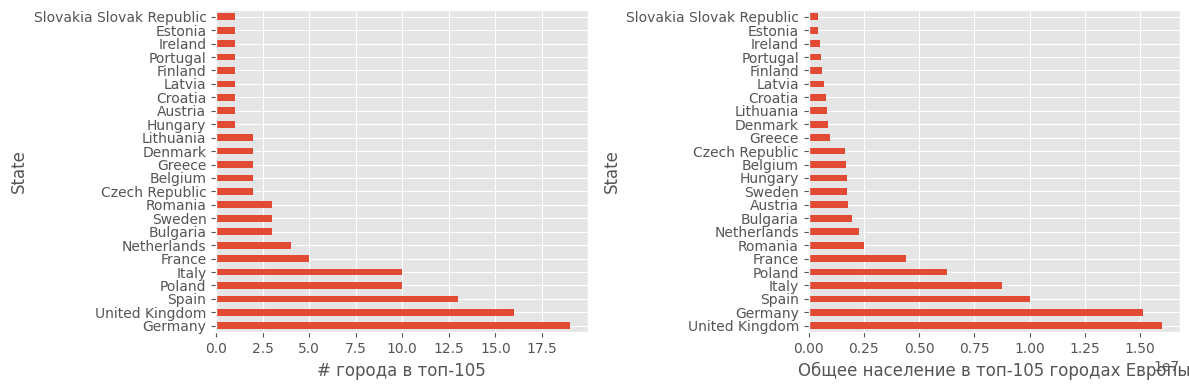

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

city_counts.plot(kind='barh', ax=ax1)
ax1.set_xlabel("# города в топ-105")
df_pop5.NumericPopulation.plot(kind='barh', ax=ax2)
ax2.set_xlabel("Общее население в топ-105 городах Европы")

fig.tight_layout()

# Упражнения

## Упражнение 1. [World Food Facts](https://github.com/guipsamora/pandas_exercises/blob/master/01_Getting_%26_Knowing_Your_Data/World%20Food%20Facts/Exercises.ipynb)

In [56]:
# Шаг 1,2. Загрузить датасет
import kagglehub
path = kagglehub.dataset_download("openfoodfacts/world-food-facts")

print("Path to dataset files:", path)

100%|██████████| 109M/109M [00:01<00:00, 91.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/openfoodfacts/world-food-facts/versions/5


In [57]:
# Шаг 3. Создать DataFrame с названием 'food' из файла .tsv
df_food = pd.read_csv(f"{path}/en.openfoodfacts.org.products.tsv", delimiter='\t')

<ipython-input-57-b09aaf0c8131>:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_food = pd.read_csv(f"{path}/en.openfoodfacts.org.products.tsv", delimiter='\t')


In [58]:
# Шаг 4. Вывести первые 5 строк
df_food.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# Шаг 5. Вывести количество позиций в таблице
len(df_food.index)

356027

In [60]:
# Шаг 6. Вывести количество колонок
len(df_food.columns)

163

In [61]:
# Шаг 7. Вывести названия всех колонок
print(df_food.columns)

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=163)


In [62]:
# Шаг 8. Какое название имеет 105 колонка
print(df_food.columns[104])

-glucose_100g


In [63]:
# Шаг 9. Какой тип данных имеет 105 колонка
df_food[df_food.columns[104]].dtype

dtype('float64')

In [64]:
# Шаг 10. Вывести название 19-ой позиции
df_food.loc[18].product_name

'Lotus Organic Brown Jasmine Rice'

## [Просрочка кредитных карт клиентов](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients)

In [65]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)
N = default_of_credit_card_clients.metadata.num_instances

# data (as pandas dataframes)
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets

In [66]:
df = X.copy(deep=True)
# задаем названия колонок
df.columns = default_of_credit_card_clients.variables['description'].to_numpy()[1:24]
# передаем таргетные значения "default"
df["DEFAULT"] = y

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [67]:
# функция нормализации, перевод значения (a,b) -> [0,1]
def normalize(col):
  min = col.min()
  max = col.max()
  return col.apply(lambda x: (x-min)/(max-min))

def plot_scatter(feature_column, target_column, xlabel, ylabel):
  plt.scatter(feature_column, target_column, marker=".", color="blue")
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  return plt

In [68]:
df.LIMIT_BAL = normalize(df["LIMIT_BAL"].copy())
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,0.010101,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,0.111111,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,0.080808,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0.040404,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,0.040404,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

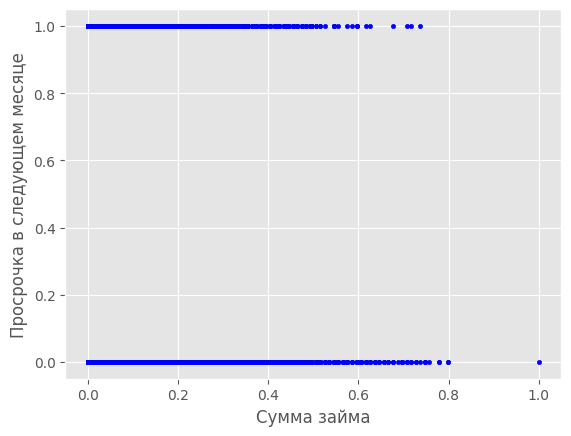

In [69]:
plot_scatter(df.LIMIT_BAL, df.DEFAULT, "Сумма займа", "Просрочка в следующем месяце")

In [70]:
df_bill = df.copy(deep=True)

# получаем сумму всех затрат за все 6 месяцев
df_bill["BILL_AMT"] = pd.Series(np.zeros(N+1, dtype=int))
for i in range(1,7):
    df_bill["BILL_AMT"] += df_bill[f"BILL_AMT{i}"]
    del df_bill[f"BILL_AMT{i}"]

df_bill.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,BILL_AMT
0,0.010101,2,2,1,24,2,2,-1,-1,-2,-2,0,689,0,0,0,0,1,7704
1,0.111111,2,2,2,26,-1,2,0,0,0,2,0,1000,1000,1000,0,2000,1,17077
2,0.080808,2,2,2,34,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,0,101653
3,0.040404,2,2,1,37,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000,0,231334
4,0.040404,1,2,1,57,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679,0,109339


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

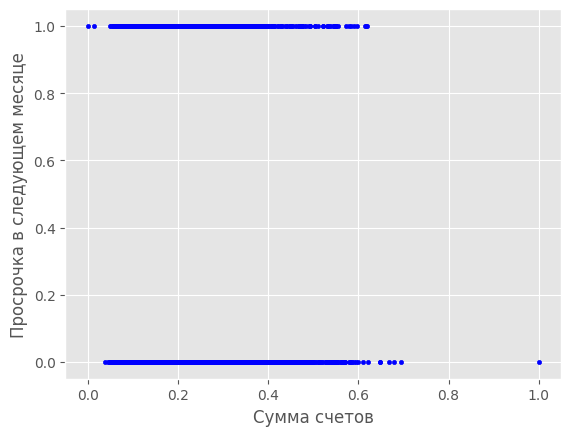

In [71]:
df_bill.BILL_AMT = normalize(df_bill.BILL_AMT)
plot_scatter(df_bill.BILL_AMT, df.DEFAULT, "Сумма счетов", "Просрочка в следующем месяце")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

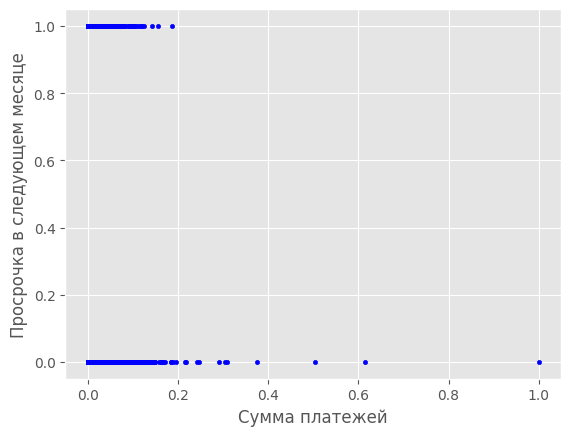

In [72]:
df_bill_pay = df_bill.copy(deep=True)
df_bill_pay["PAY_AMT"] = pd.Series(np.zeros(N+1, dtype=int))
# получаем сумму платежей за все 6 месяцевs
for i in range(1,7):
    df_bill_pay["PAY_AMT"] += df_bill_pay[f"PAY_AMT{i}"]
    del df_bill_pay[f"PAY_AMT{i}"]

df_bill_pay.PAY_AMT = normalize(df_bill_pay.PAY_AMT)
plot_scatter(df_bill_pay.PAY_AMT, df.DEFAULT, "Сумма платежей", "Просрочка в следующем месяце")

## Упражнение 2. [Chipotle](https://github.com/guipsamora/pandas_exercises/blob/master/01_Getting_%26_Knowing_Your_Data/Chipotle/Exercises.ipynb)

In [73]:
# Шаг 2 и 3. Импортировать датасет по ссылке и присвоить имя датафрейму "chipo"
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', delimiter='\t')

In [74]:
# Шаг 4. Вывести первые 10 строк
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [75]:
# Шаг 5. Какое количество наблюдений в этом датасете?
# Решение 1
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [76]:
# Решение 2
len(chipo.index)

4622

In [77]:
# Шаг 6. Каково количество столбцов в таблице
len(chipo.columns)

5

In [78]:
# Шаг 7. Вывести названия столбцов
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [79]:
# Шаг 8. Как проиндексирован датасет?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [80]:
# Шаг 9. Какая позиция была заказана больше всего?
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(by='quantity', ascending=False)
c[['order_id', 'quantity']].head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [81]:
chipo.choice_description.head(10)

,choice_description
0,NaN
1,[Clementine]
2,[Apple]
3,NaN
4,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans..."
5,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou..."
6,NaN
7,"[Tomatillo Red Chili Salsa, [Fajita Vegetables..."
8,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch..."
9,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto..."


In [82]:
# Шаг 11. Какая позиция в 'choice_description' была заказана больше всего?
c = chipo.groupby(by='choice_description').sum()
c = c.sort_values(by='quantity', ascending=False)
c['quantity'].head(1)

,quantity
choice_description,
[Diet Coke],159


In [83]:
# Шаг 12. Сколько всего позиций было заказано?
chipo.quantity.sum()

4972

In [84]:
# Шаг 13. Перевести 'item_price' в тип float
print(chipo.item_price.dtype)
chipo['item_price'] = chipo.item_price.apply(lambda x: float(x.replace('$', '')))
print(chipo.head())
print(chipo.item_price.dtype)

object
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description  item_price  
0                                                NaN        2.39  
1                                       [Clementine]        3.39  
2                                            [Apple]        3.39  
3                                                NaN        2.39  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  
float64


In [85]:
# Шаг 14. Какая прибыль была за этот период?
chipo.item_price.sum()

34500.16

In [86]:
# Шаг 15. Сколько заказов было сделано за этот период?
chipo.order_id.max()

1834

In [87]:
# Шаг 16. Какая средняя прибыль была в каждом заказе?
chipo['revenue'] = chipo.quantity * chipo.item_price
chipo.groupby(by=['order_id']).sum().mean(numeric_only=True)['revenue']

21.39423118865867

## Упражнение 3. [Occupation](https://github.com/guipsamora/pandas_exercises/blob/master/01_Getting_%26_Knowing_Your_Data/Occupation/Exercises.ipynb)

In [88]:
# Шаг 2,3. Импортировать csv файл в DataFrame с названием 'users' и индексом 'user_id'
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", delimiter='|', index_col='user_id')
users

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


In [89]:
# Шаг 4. Вывести первые 25 строк
users.head(25)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


In [90]:
# Шаг 6. Сколько пользователей в этой таблице?
len(users.index)

943

In [91]:
# Шаг 8. Вывести названия колонок
users.columns

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [92]:
# Шаг 9. Как индексирована таблица?
users.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
      dtype='int64', name='user_id', length=943)

In [93]:
# Шаг 10. Какой тип у каждой колонки?
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 1 to 943
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         943 non-null    int64 
 1   gender      943 non-null    object
 2   occupation  943 non-null    object
 3   zip_code    943 non-null    object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


In [94]:
# Шаг 11. Вывести колонку 'occupation'
users.occupation

,occupation
user_id,
1,technician
2,other
3,writer
4,technician
5,other
...,...
939,student
940,administrator
941,student


In [95]:
# Шаг 12. Сколько различных значений в этой колонке?
len(users.occupation.unique())

21

In [96]:
# Шаг 13. Какая наиболее часто встречающаяся активность?
users.occupation.value_counts().head()

,count
occupation,
student,196
other,105
educator,95
administrator,79
engineer,67


In [97]:
# Шаг 14. Вывести статистику датафрейма
users.describe()

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


In [98]:
# Шаг 15. Вывести статистику всех колонок
users.describe(include='all')

,age,gender,occupation,zip_code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


In [99]:
# Шаг 16. Вывести статистику колонки 'occupation'
users.occupation.describe()

,occupation
count,943
unique,21
top,student
freq,196


In [100]:
# Шаг 17. Вывести среднее значение возраста
users.age.mean()

34.05196182396607

In [101]:
# Шаг 18. Какой возраст реже всего встречается в этой таблице?
users.age.value_counts().tail(1)

,count
age,
73,1


## Упражнение 4. [Chipotle](https://github.com/guipsamora/pandas_exercises/blob/master/02_Filtering_%26_Sorting/Chipotle/Exercises.ipynb)

In [102]:
# Шаг 2, 3. Импортировать датасет и происвоить имя 'chipo'
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', delimiter='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [103]:
# Шаг 4. Сколько блюд стоят больше $10?
if (chipo.item_price.dtype != 'float64'):
  chipo.item_price = chipo.item_price.apply(lambda x: float(x.replace('$', '')))

chipo_unique = chipo.drop_duplicates(subset=['item_name', 'quantity'])
len(chipo_unique[(chipo_unique.item_price > 10)][chipo_unique.quantity == 1])

<ipython-input-103-f273957e8524>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(chipo_unique[(chipo_unique.item_price > 10)][chipo_unique.quantity == 1])


12

In [104]:
# Шаг 5. Какая стоимость каждого блюда?
chipo_unique[chipo_unique.quantity == 1][['item_name', 'item_price']].sort_values(by='item_price', ascending=False)

,item_name,item_price
606,Steak Salad Bowl,11.89
1229,Barbacoa Salad Bowl,11.89
1132,Carnitas Salad Bowl,11.89
7,Steak Burrito,11.75
168,Barbacoa Crispy Tacos,11.75
39,Barbacoa Bowl,11.75
738,Veggie Soft Tacos,11.25
186,Veggie Salad Bowl,11.25
62,Veggie Bowl,11.25
57,Veggie Burrito,11.25


In [105]:
# Шаг 6. Сделать сортировку по названию блюда
chipo.sort_values(by='item_name')

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49
...,...,...,...,...,...
2384,948,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
781,322,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Black Beans, Cheese, Sou...",8.75
2851,1132,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49
1699,688,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25


In [106]:
# Шаг 7. В каком количестве заказали самую дорогую позицию в одном заказе?
chipo.sort_values(by='item_price', ascending=False).head(1)

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25


In [107]:
# Шаг 8. Сколько раз был заказан 'Veggie Salad Bowl'
chipo[chipo.item_name == 'Veggie Salad Bowl'].sum().quantity

18

In [108]:
# Шаг 9. Сколько раз заказали как минимум один 'Canned Soda'?
len(chipo[(chipo.item_name == 'Canned Soda') & (chipo.quantity > 1)])

20

## История моих просмотров YouTube

In [109]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [111]:
df_watch_later = pd.read_csv("./youtube/watch-later.csv")
df_watch_later.columns = ["ID", "Date"]
df_watch_later = df_watch_later.set_index("ID")
df_watch_later.head()

,Date
ID,
ppBU5j8YLWo,2024-11-05T19:21:52+00:00
aH25PrEJbVo,2024-11-03T17:21:53+00:00
UCpbg4H_0hw,2024-10-30T19:26:38+00:00
VjNqTKzdsGo,2024-10-21T11:04:29+00:00
yeatOU5vVsA,2024-10-16T14:57:23+00:00


In [112]:
df_watch_later.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, ppBU5j8YLWo to DCTPqiGLeRU
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    197 non-null    object
dtypes: object(1)
memory usage: 3.1+ KB


In [113]:
!head -n 20 "./youtube/history.json"

{
  "columns": [
    "comment_count",
    "duration",
    "view_count",
    "timestamp",
    "like_count",
    "channel",
    "channel_follower_count"
  ],
  "index": [
    "aQMHUnsvOZ4",
    "ePkaABTAetY",
    "8pMfUopQ9Es",
    "QkpMsbmrsEE",
    "U9oZS_FtNPM",
    "kBcMVtuWx34",
    "OM7W-k8JcGM",
    "ODMNrHvyo7Y",
    "WSMFnJnY7EA",


In [114]:
!tail -n 20 "./youtube/history.json"

    [
      7100,
      55,
      4061067,
      1713220309,
      388285,
      "Vsauce",
      23300000
    ],
    [
      973,
      1009,
      776031,
      1694340047,
      22905,
      "\u0417\u0415 \u041c\u0410\u041a\u041a\u0415\u0420\u0421",
      264000
    ]
  ]
}

In [115]:
df_history = pd.read_json("./youtube/history.json", orient='split')
df_history.head(7)

,comment_count,duration,view_count,timestamp,like_count,channel,channel_follower_count
aQMHUnsvOZ4,3.0,11.0,6801.0,2022-11-17 10:09:41,404.0,FLIP YOUR WIG,132000.0
ePkaABTAetY,11000.0,63.0,8220470.0,2020-09-09 19:00:10,415968.0,Shykai,8970.0
8pMfUopQ9Es,4.0,3448.0,11697.0,2015-08-10 13:21:20,257.0,"JPoint, Joker и JUG ru — Java-конференции",55300.0
QkpMsbmrsEE,295.0,1240.0,72038.0,2024-02-06 08:52:45,4582.0,Кошачья Бацыла,101000.0
U9oZS_FtNPM,4.0,53.0,1869.0,2024-11-13 19:20:29,62.0,Line Indent,7740.0
kBcMVtuWx34,452.0,124.0,62742.0,2024-10-24 18:47:21,3818.0,OLD ZACK,282.0
OM7W-k8JcGM,1.0,10.0,20258.0,2020-09-04 06:14:35,342.0,ARTHAS TV,3550.0


In [116]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
Index: 644 entries, aQMHUnsvOZ4 to tyDSxcEzZ9E
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   comment_count           630 non-null    float64       
 1   duration                634 non-null    float64       
 2   view_count              634 non-null    float64       
 3   timestamp               634 non-null    datetime64[ns]
 4   like_count              633 non-null    float64       
 5   channel                 634 non-null    object        
 6   channel_follower_count  634 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 56.4+ KB


In [117]:
df_liked = pd.read_json("./youtube/liked.json", orient='split')
# здесь pandas читает файл json по такой схеме "split"
# {
#   "columns": ["col1", "col2"],
#   "index": [1, 2, 3, 5],
#   "data": [
#     3,
#     "value"
#   ]
# }
df_liked.head()

,title,videoOwnerChannelTitle
4j6SIDXwIgM,it's been fun.,Man Carrying Thing
QLhqYNsPIVo,Тренировки по алгоритмам от Яндекса. Лекция 1:...,Яндекс Образование
yup8gIXxWDU,NANOWAR OF STEEL - HelloWorld.java (Source Cod...,Napalm Records
TpINsKmOwAk,"Игровые Истории: Грибные Мальчики, Нация Ботов...",БУЛДЖАТь
vf0kLSZO-wc,TubeMod - Customize Your YouTube Experience,Pedro Gregório


In [118]:
df_liked.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 4j6SIDXwIgM to GJY8OMJXRAk
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   277 non-null    object
 1   videoOwnerChannelTitle  277 non-null    object
dtypes: object(2)
memory usage: 14.6+ KB


In [119]:
# заполняем столбец "from_watch_later", т.е. было ли видео в плейлисте "Смотреть позже"
df_history["from_watch_later"] = df_history.index.isin(df_watch_later.index).astype(int)
df_history.head(10)

,comment_count,duration,view_count,timestamp,like_count,channel,channel_follower_count,from_watch_later
aQMHUnsvOZ4,3.0,11.0,6801.0,2022-11-17 10:09:41,404.0,FLIP YOUR WIG,132000.0,0
ePkaABTAetY,11000.0,63.0,8220470.0,2020-09-09 19:00:10,415968.0,Shykai,8970.0,0
8pMfUopQ9Es,4.0,3448.0,11697.0,2015-08-10 13:21:20,257.0,"JPoint, Joker и JUG ru — Java-конференции",55300.0,0
QkpMsbmrsEE,295.0,1240.0,72038.0,2024-02-06 08:52:45,4582.0,Кошачья Бацыла,101000.0,0
U9oZS_FtNPM,4.0,53.0,1869.0,2024-11-13 19:20:29,62.0,Line Indent,7740.0,0
kBcMVtuWx34,452.0,124.0,62742.0,2024-10-24 18:47:21,3818.0,OLD ZACK,282.0,0
OM7W-k8JcGM,1.0,10.0,20258.0,2020-09-04 06:14:35,342.0,ARTHAS TV,3550.0,0
ODMNrHvyo7Y,63.0,8.0,130722.0,2020-09-04 06:44:10,2259.0,ARTHAS TV,3550.0,0
WSMFnJnY7EA,1900.0,650.0,566102.0,2024-08-04 23:27:51,24838.0,Phoebe Yu,79000.0,0
ppBU5j8YLWo,899.0,1221.0,280036.0,2024-09-17 15:16:02,12663.0,EposVox,341000.0,1


In [120]:
# заполняем столбец лайкнутых видео
df_history["liked"] = df_history.index.isin(df_liked.index).astype(int)
df_history.tail(10)

,comment_count,duration,view_count,timestamp,like_count,channel,channel_follower_count,from_watch_later,liked
21T-Sc-TXJY,5000.0,429.0,4083991.0,2023-01-08 20:30:00,196512.0,videogamedunkey,7530000.0,0,0
Uhqz3SWNrJE,245.0,93.0,93379.0,2024-04-05 16:28:47,2514.0,ForceofPhoenix,704.0,0,0
GwutQhFwwyI,1000.0,93.0,1295601.0,2023-09-16 09:28:05,57374.0,Not_Vkron,2370.0,0,0
OUqLhLS07CI,4500.0,100.0,829826.0,2024-07-26 14:00:31,65828.0,Concept Central,91500.0,0,0
0Lq1uQmUTxc,234.0,758.0,27590.0,2019-07-24 22:57:17,524.0,Laptop Retrospective,27400.0,1,0
J7jHMyT5PJc,1700.0,11.0,1400799.0,2022-02-13 15:36:51,60533.0,COUNCIL PIPE,1370.0,1,1
KLGfeiMdi1Q,11000.0,1324.0,7222864.0,2022-02-12 00:31:07,277572.0,Shank Mods,414000.0,0,1
yPfagLeUa7k,1400.0,1638.0,643285.0,2023-08-31 23:26:07,38336.0,Acerola,247000.0,1,1
0r7DmVdR5AA,7100.0,55.0,4061067.0,2024-04-15 22:31:49,388285.0,Vsauce,23300000.0,0,1
tyDSxcEzZ9E,973.0,1009.0,776031.0,2023-09-10 10:00:47,22905.0,ЗЕ МАККЕРС,264000.0,0,1


In [121]:
# выкинем пустые строки и запишем в дата фрейм 'df'
df = df_history.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, aQMHUnsvOZ4 to tyDSxcEzZ9E
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   comment_count           629 non-null    float64       
 1   duration                629 non-null    float64       
 2   view_count              629 non-null    float64       
 3   timestamp               629 non-null    datetime64[ns]
 4   like_count              629 non-null    float64       
 5   channel                 629 non-null    object        
 6   channel_follower_count  629 non-null    float64       
 7   from_watch_later        629 non-null    int64         
 8   liked                   629 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 49.1+ KB


In [122]:
# какова средняя продолжительность лайкнутых видео
df[df.liked == 1].duration.mean()

598.4313725490196

In [123]:
# какое самое длинное понравившееся видео (в минутах)
max_liked_duration = df[df.liked == 1].duration.max()
print(max_liked_duration / 60)
df[df.duration == max_liked_duration]

48.45


,comment_count,duration,view_count,timestamp,like_count,channel,channel_follower_count,from_watch_later,liked
6_wK_Ud8--0,289.0,2907.0,305164.0,2023-02-01 11:30:05,7149.0,Philipp Lackner,192000.0,0,1


In [124]:
# какое самое короткое понравившееся видео (в секундах)
min_liked_duration = df[df.liked == 1].duration.min()
print(min_liked_duration)
df[df.duration == min_liked_duration][df.liked == 1]

11.0


<ipython-input-124-c3590d5f0203>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.duration == min_liked_duration][df.liked == 1]


,comment_count,duration,view_count,timestamp,like_count,channel,channel_follower_count,from_watch_later,liked
J7jHMyT5PJc,1700.0,11.0,1400799.0,2022-02-13 15:36:51,60533.0,COUNCIL PIPE,1370.0,1,1


In [125]:
# сколько всего лайкнутых видео
len(df[df.liked == 1])

51

In [126]:
df.liked.mean() * 100
# ~8% просмотренных мною видео я лайкнул

8.108108108108109

<Axes: title={'center': 'Гистограмма просмотров лайкнутых видео'}, ylabel='Frequency'>

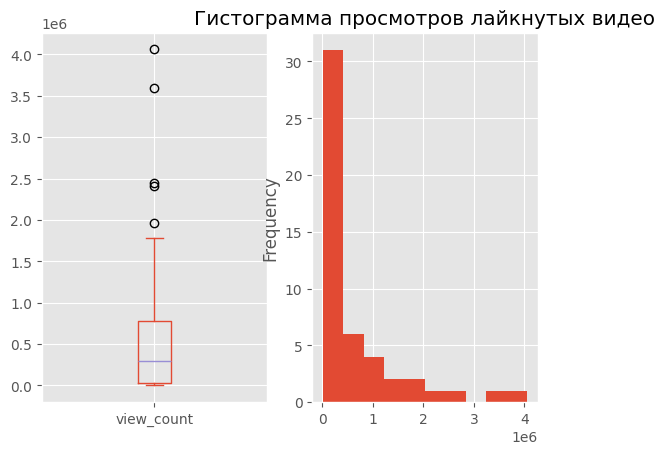

In [127]:
# построим графики количества просмотров лайкнутых видео
fig, axes = plt.subplots(1, 2)
# функция query(), подобно запросам SQL, выводит DataFrame, который удовлетворяет
# условиям, переданные функции
df.query("liked == 1 & view_count < 5000000").view_count.plot(kind='box', ax=axes[0])
df.query("liked == 1 & view_count < 5000000").view_count.plot(kind='hist', ax=axes[1], title="Гистограмма просмотров лайкнутых видео")

In [128]:
s_duration_cut = pd.cut(df['duration'], bins=[0, 300, 600, 1200, 4200], labels=['Short', 'Medium', 'Long', 'Very long'])
# функция cut() разбивает значения DataFrame (Series, массив), на различные
# сегменты. особенно удобно преобразовать числовые значения в категориальные
s_duration_cut.describe()

,duration
count,625
unique,4
top,Short
freq,365


<Axes: title={'center': 'Гистограмма продолжительности лайкнутых видео'}, xlabel='Продолжительность', ylabel='Количество'>

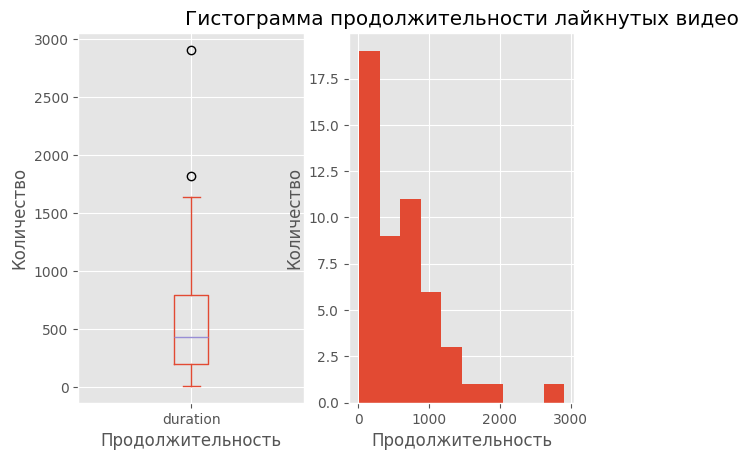

In [129]:
# посмотрим распределение лайкнутых видео по продолжительности ролика
fig, axes = plt.subplots(1, 2)
df[df.liked == 1].duration.plot(kind='box', ax=axes[0], xlabel="Продолжительность", ylabel="Количество")
df[df.liked == 1].duration.plot(kind='hist', ax=axes[1], title="Гистограмма продолжительности лайкнутых видео", xlabel="Продолжительность", ylabel="Количество")

In [130]:
# какая часть составляет видео, длительностью более 20 минут, от всех видео
len(df.query("duration > 1200")) / len(df) * 100

7.94912559618442

In [131]:
df.query("duration > 1200").sort_values(by='duration', ascending=False)

,comment_count,duration,view_count,timestamp,like_count,channel,channel_follower_count,from_watch_later,liked
eJ-yNob0pII,483.0,36036.0,378826.0,2023-07-25 10:26:53,16242.0,𝓜𝓪𝓼𝓸𝓷,1290.0,0,0
mQJ6q1ZCzsg,384.0,18000.0,1254458.0,2019-09-27 06:45:08,11874.0,Nature Sounds TV,31900.0,0,0
qVVtocnPH2k,409.0,7450.0,94952.0,2022-10-15 15:06:25,3923.0,ByteSeb,7550.0,0,0
xf2W1wZozbk,435.0,5855.0,229651.0,2024-05-29 19:15:01,7984.0,Cococry,11100.0,0,0
fTc5jBCSLUE,832.0,3785.0,117639.0,2024-07-20 10:06:08,6570.0,sanity lost,4590.0,0,0
CB42Hz349JM,3200.0,3662.0,1725076.0,2023-08-22 14:31:02,37694.0,Soren.,3570.0,0,0
vr5dCRHAgb0,2900.0,3485.0,2960186.0,2022-02-26 17:00:11,86066.0,Musicombo,26500.0,0,0
8pMfUopQ9Es,4.0,3448.0,11697.0,2015-08-10 13:21:20,257.0,"JPoint, Joker и JUG ru — Java-конференции",55300.0,0,0
-gmWbD5kGIk,601.0,3234.0,211450.0,2024-09-15 13:23:06,4247.0,ThePrimeTime,652000.0,0,0
x-JDXuC2Sos,31.0,2969.0,9223.0,2024-04-22 20:09:20,87.0,IT Freedom Project,900.0,0,0


In [132]:
# посчитаем корреляцию между количеством просмотров и продолжительностью видео
df[["view_count", "duration"]].corr()

,view_count,duration
view_count,1.000000,-0.061795
duration,-0.061795,1.000000


In [133]:
# посчитаем корреляцию между количеством просмотров и продолжительностю понравившихся видео
df[df.liked == 1][["view_count", "duration"]].corr()

,view_count,duration
view_count,1.000000,-0.041575
duration,-0.041575,1.000000


In [134]:
# посчитаем корреляцию между количеством лайков и числом подписчиков канала.
df[["like_count", "channel_follower_count"]].corr()

,like_count,channel_follower_count
like_count,1.000000,0.758457
channel_follower_count,0.758457,1.000000


In [135]:
# посчитаем коэффициент вовлеченности
df = df.assign(engagement=lambda x: x['like_count'] / x['view_count'])
df.head()

,comment_count,duration,view_count,timestamp,like_count,channel,channel_follower_count,from_watch_later,liked,engagement
aQMHUnsvOZ4,3.0,11.0,6801.0,2022-11-17 10:09:41,404.0,FLIP YOUR WIG,132000.0,0,0,0.059403
ePkaABTAetY,11000.0,63.0,8220470.0,2020-09-09 19:00:10,415968.0,Shykai,8970.0,0,0,0.050601
8pMfUopQ9Es,4.0,3448.0,11697.0,2015-08-10 13:21:20,257.0,"JPoint, Joker и JUG ru — Java-конференции",55300.0,0,0,0.021971
QkpMsbmrsEE,295.0,1240.0,72038.0,2024-02-06 08:52:45,4582.0,Кошачья Бацыла,101000.0,0,0,0.063605
U9oZS_FtNPM,4.0,53.0,1869.0,2024-11-13 19:20:29,62.0,Line Indent,7740.0,0,0,0.033173


In [136]:
df.engagement.describe()

,engagement
count,629.000000
mean,0.047884
std,0.025686
min,0.003486
25%,0.029128
50%,0.042646
75%,0.062582
max,0.182187


In [137]:
# посчитаем корреляцию между вовлеченностью зрителей и количеством комментариев
df[["engagement", "comment_count"]].corr()

,engagement,comment_count
engagement,1.000000,0.127312
comment_count,0.127312,1.000000


<Axes: xlabel='engagement', ylabel='comment_count'>

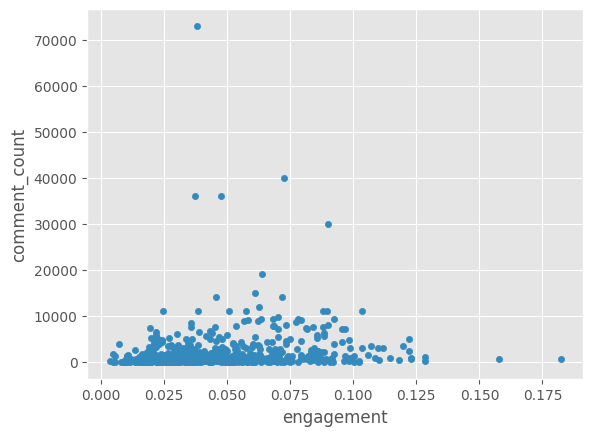

In [138]:
df[["engagement", "comment_count"]].plot(x=0, y=1, kind="scatter")

In [139]:
# сколько видео из плейлиста "Смотреть позже" я действительно посмотрел
len(df[df.from_watch_later == 1])

34

In [140]:
# сколько при этом видео я лайкнул
len(df[df.from_watch_later == 1][df.liked == 1])

<ipython-input-140-5c81e9016be4>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df.from_watch_later == 1][df.liked == 1])


13

In [141]:
# посмотрим на статистику каналов
df.channel.describe()

,channel
count,629
unique,395
top,Vsauce
freq,35


In [142]:
df_channel = df.set_index('channel')
df_channel.sort_values(by=['view_count', 'channel'], ascending=[False, True])

,comment_count,duration,view_count,timestamp,like_count,channel_follower_count,from_watch_later,liked,engagement
channel,,,,,,,,,
Zach Ace,7300.0,45.0,44535317.0,2016-09-13 17:16:29,863535.0,71300.0,0,0,0.019390
Saft,36000.0,12.0,33062132.0,2015-08-05 15:39:02,1231006.0,9890.0,0,0,0.037233
Vsauce,9300.0,48.0,23873785.0,2024-08-13 23:15:56,1518253.0,23300000.0,0,0,0.063595
Jombo,36000.0,30.0,22339225.0,2018-02-23 05:20:29,1067542.0,74500.0,0,0,0.047788
Alexa Real,1700.0,78.0,22189946.0,2022-12-19 03:34:14,106056.0,3750000.0,0,0,0.004779
...,...,...,...,...,...,...,...,...,...
ApolloSoft,10.0,313.0,574.0,2024-10-04 23:10:44,32.0,33.0,0,0,0.055749
My 4 Amazing Pets,4.0,33.0,494.0,2024-10-03 14:38:36,17.0,310.0,0,0,0.034413
Pink sid----,10.0,570.0,359.0,2023-12-18 10:21:31,24.0,1100.0,0,0,0.066852


In [143]:
s_channel_count = df.groupby(by='channel').size().sort_values(ascending=False)
s_channel_count.name = "Count"
# топ-10 просматриваемых каналов
s_channel_count.head(10)

,Count
channel,
Vsauce,35
Nir Lichtman,33
Man Carrying Thing,19
Luke Smith,11
Fireship,11
Mental Outlaw,9
videogamedunkey,9
NakeyJakey,9
The Linux Cast,7


<Axes: ylabel='Count'>

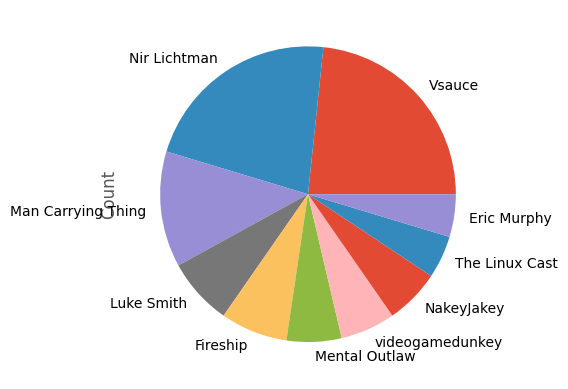

In [144]:
s_channel_count[:10].plot(kind='pie')

In [145]:
from sklearn.cluster import KMeans

In [146]:
df_top_10_channels = df[df.channel.isin(s_channel_count[:10].index)]
df_top_10_channels.timestamp = pd.to_datetime(df_top_10_channels.timestamp, unit='ns')
df_top_10_channels.timestamp = df.timestamp.view('int64')
df_top_10_channels.head()

<ipython-input-146-66a5384830e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10_channels.timestamp = pd.to_datetime(df_top_10_channels.timestamp, unit='ns')
<ipython-input-146-66a5384830e4>:3: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df_top_10_channels.timestamp = df.timestamp.view('int64')
<ipython-input-146-66a5384830e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10_channels.timestamp 

,comment_count,duration,view_count,timestamp,like_count,channel,channel_follower_count,from_watch_later,liked,engagement
2oWqD3JCXuI,105.0,979.0,71161.0,1637161203000000000,1469.0,Eric Murphy,84900.0,0,0,0.020643
8ax62B_7NhY,3800.0,19.0,4386975.0,1684447375000000000,321145.0,Man Carrying Thing,525000.0,0,0,0.073204
cO3PcHD_2Po,1100.0,48.0,237190.0,1729196409000000000,19582.0,Man Carrying Thing,525000.0,0,0,0.082558
dWXn62YWVjk,555.0,678.0,27512.0,1728519796000000000,1800.0,The Linux Cast,59200.0,0,0,0.065426
0djdUypilBs,3500.0,767.0,1910436.0,1696108300000000000,120037.0,NakeyJakey,2080000.0,0,0,0.062832


In [147]:
X = df_top_10_channels[["duration", "comment_count", "channel_follower_count",
                        "timestamp", "engagement"]].values
model = KMeans(n_clusters=10, max_iter=1000, random_state=5)
model.fit(X)
print("labels ", model.labels_, "\n")
print("cluster center ", model.cluster_centers_, "\n")
model_predictions = model.predict(X)

labels  [4 7 0 0 3 8 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 8 2 2 8 4 7 0 6 3 6 0 0 0 0 0 1 0 3 0 5 0 3 0 3 3 0 1 0 0
 0 0 5 3 3 3 3 3 3 3 3 3 4 1 4 4 0 1 7 5 0 0 0 7 4 3 0 0 3 7 0 3 3 3 7 7 7
 3 3 5 0 7 7 7 7 7 0 0 0 6 5 0 0 5 0 5 5 4 0 2 0 0 0 7 7 7 5 1 0 3 3 1 4 9
 7 0] 

cluster center  [[1.84608108e+02 4.71994595e+03 1.20819689e+07 1.72352053e+18
  7.73069196e-02]
 [4.98571429e+02 5.33142857e+02 1.67871429e+06 1.59368278e+18
  3.74416997e-02]
 [4.84333333e+02 2.07166667e+03 1.45833333e+06 1.48234604e+18
  3.65567143e-02]
 [2.68560000e+02 6.08800000e+02 3.56208000e+05 1.69855713e+18
  4.70778639e-02]
 [7.14625000e+02 6.56000000e+02 7.53462500e+05 1.63969951e+18
  3.48858392e-02]
 [6.86555556e+02 8.61777778e+02 6.66255556e+05 1.61308846e+18
  5.48741388e-02]
 [5.83000000e+02 7.09433333e+03 1.45833333e+06 1.53227969e+18
  4.54015802e-02]
 [4.66882353e+02 1.09082353e+03 7.30470588e+05 1.68195375e+18
  3.80459622e-02]
 [4.69333333e+02 2.60000000e

In [148]:
df_X_labeled = df_top_10_channels
df_X_labeled["label"] = model.labels_

<ipython-input-148-60903dd906b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X_labeled["label"] = model.labels_


In [149]:
df_X_labeled.query("channel == 'Vsauce'")

,comment_count,duration,view_count,timestamp,like_count,channel,channel_follower_count,from_watch_later,liked,engagement,label
n2x7d5hAmXs,9200.0,60.0,8006424.0,1718975960000000000,634284.0,Vsauce,23300000.0,0,0,0.079222,0
iV_VB05iT9k,5600.0,60.0,8087520.0,1719255732000000000,713707.0,Vsauce,23300000.0,0,0,0.088248,0
FHB8Bn3tYdY,11000.0,60.0,17088657.0,1719415941000000000,1503308.0,Vsauce,23300000.0,0,0,0.087971,0
G3mWzKhLl8s,9300.0,60.0,13195668.0,1719612223000000000,1028482.0,Vsauce,23300000.0,0,0,0.077941,0
jDjJdJSvyBg,5200.0,60.0,6937021.0,1719956201000000000,595409.0,Vsauce,23300000.0,0,0,0.085831,0
6uCop3Ug5OQ,6300.0,60.0,7115380.0,1720115878000000000,630510.0,Vsauce,23300000.0,0,0,0.088612,0
RHmnJiF67zc,11000.0,60.0,7299807.0,1720461922000000000,755259.0,Vsauce,23300000.0,0,0,0.103463,0
uzrF987_FkE,8600.0,59.0,18100861.0,1720635938000000000,1402533.0,Vsauce,23300000.0,0,0,0.077484,0
4bmrcZHi-0s,14000.0,60.0,19843189.0,1720805758000000000,1427486.0,Vsauce,23300000.0,0,0,0.071938,0
DtAtNp5NL1s,7600.0,59.0,9056738.0,1721084094000000000,797681.0,Vsauce,23300000.0,0,0,0.088076,0


# Упражнение 5. [Regiment](https://github.com/guipsamora/pandas_exercises/blob/master/03_Grouping/Regiment/Exercises.ipynb)

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
# Шаг 2. Создать DataFrame 'regiment' со следующими данными
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

regiment = pd.DataFrame(raw_data, columns=raw_data.keys())
regiment.head()

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70


In [152]:
# Шаг 4. Какое среднее значение 'preTestScore' у группы 'Nighthawks'?
regiment.query("regiment == 'Nighthawks'").groupby(by='regiment').preTestScore.mean()

,preTestScore
regiment,
Nighthawks,15.25


In [153]:
# Шаг 5. Вывести общую статистику по компаниям
regiment.groupby(by='company').describe()

preTestScore                                                      \
               count       mean        std  min   25%   50%    75%   max   
company                                                                    
1st              6.0   6.666667   8.524475  2.0  3.00   3.5   4.00  24.0   
2nd              6.0  15.500000  14.652645  2.0  2.25  13.5  29.25  31.0   

        postTestScore                                                       
                count       mean        std   min    25%   50%   75%   max  
company                                                                     
1st               6.0  57.666667  27.485754  25.0  34.25  66.0  70.0  94.0  
2nd               6.0  67.000000  14.057027  57.0  58.25  62.0  68.0  94.0

In [154]:
# Шаг 6. Какое среднее значение 'preTestScore' у каждой компании?
regiment.groupby(by='company').preTestScore.mean()

,preTestScore
company,
1st,6.666667
2nd,15.500000


In [155]:
# Шаг 7. Вывести среднее значение 'preTestScore', сгруппированное по 'regiment'
# и 'company'
regiment.groupby(by=['regiment', 'company']).preTestScore.mean()

regiment    company
Dragoons    1st         3.5
            2nd        27.5
Nighthawks  1st        14.0
            2nd        16.5
Scouts      1st         2.5
            2nd         2.5
Name: preTestScore, dtype: float64

In [156]:
# Шаг 8. Вывести среднее значение 'preTestScores', сгруппированное по 'regiment'
# и 'company', без иерархического индексирования
regiment.groupby(by=['regiment', 'company']).preTestScore.mean().unstack()

# unstack() "разворачивает" таблицу, т.е. создает новую таблицу, в которой
# значения одного столбца становится заголовками столбцов, а значения другого
# столбца становятся значениями в новой таблице

company,1st,2nd
regiment,,
Dragoons,3.5,27.5
Nighthawks,14.0,16.5
Scouts,2.5,2.5


In [157]:
# Шаг 11. Пройтись по каждой группе и вывести 'name' и данные из 'regiment'
for name, group in regiment.groupby(by='regiment'):
  print(name)
  print(group)

Dragoons
   regiment company    name  preTestScore  postTestScore
4  Dragoons     1st   Cooze             3             70
5  Dragoons     1st   Jacon             4             25
6  Dragoons     2nd  Ryaner            24             94
7  Dragoons     2nd    Sone            31             57
Nighthawks
     regiment company      name  preTestScore  postTestScore
0  Nighthawks     1st    Miller             4             25
1  Nighthawks     1st  Jacobson            24             94
2  Nighthawks     2nd       Ali            31             57
3  Nighthawks     2nd    Milner             2             62
Scouts
   regiment company   name  preTestScore  postTestScore
8    Scouts     1st  Sloan             2             62
9    Scouts     1st  Piger             3             70
10   Scouts     2nd  Riani             2             62
11   Scouts     2nd    Ali             3             70
